In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(r"D:\data preparing and visualization\train.csv")   

In [3]:

num_cols = [
    "Basic_Demos-Age",

    "CGAS-CGAS_Score",

    "Physical-BMI",
    "Physical-Height",
    "Physical-Weight",
    "Physical-Waist_Circumference",
    "Physical-Diastolic_BP",
    "Physical-HeartRate",
    "Physical-Systolic_BP",

    "Fitness_Endurance-Max_Stage",
    "Fitness_Endurance-Time_Mins",
    "Fitness_Endurance-Time_Sec",

    "FGC-FGC_CU",
    "FGC-FGC_GSND",
    "FGC-FGC_GSD",
    "FGC-FGC_PU",
    "FGC-FGC_SRL",
    "FGC-FGC_SRR",
    "FGC-FGC_TL",

    "BIA-BIA_BMC",
    "BIA-BIA_BMI",
    "BIA-BIA_BMR",
    "BIA-BIA_DEE",
    "BIA-BIA_ECW",
    "BIA-BIA_FFM",
    "BIA-BIA_FFMI",
    "BIA-BIA_FMI",
    "BIA-BIA_Fat",
    "BIA-BIA_ICW",
    "BIA-BIA_LDM",
    "BIA-BIA_LST",
    "BIA-BIA_SMM",
    "BIA-BIA_TBW",

    "PAQ_A-PAQ_A_Total",
    "PAQ_C-PAQ_C_Total",

    "PCIAT-PCIAT_Total",

    "SDS-SDS_Total_Raw",
    "SDS-SDS_Total_T"
]
# -----------------------------------------------------------------



num_cols



['Basic_Demos-Age',
 'CGAS-CGAS_Score',
 'Physical-BMI',
 'Physical-Height',
 'Physical-Weight',
 'Physical-Waist_Circumference',
 'Physical-Diastolic_BP',
 'Physical-HeartRate',
 'Physical-Systolic_BP',
 'Fitness_Endurance-Max_Stage',
 'Fitness_Endurance-Time_Mins',
 'Fitness_Endurance-Time_Sec',
 'FGC-FGC_CU',
 'FGC-FGC_GSND',
 'FGC-FGC_GSD',
 'FGC-FGC_PU',
 'FGC-FGC_SRL',
 'FGC-FGC_SRR',
 'FGC-FGC_TL',
 'BIA-BIA_BMC',
 'BIA-BIA_BMI',
 'BIA-BIA_BMR',
 'BIA-BIA_DEE',
 'BIA-BIA_ECW',
 'BIA-BIA_FFM',
 'BIA-BIA_FFMI',
 'BIA-BIA_FMI',
 'BIA-BIA_Fat',
 'BIA-BIA_ICW',
 'BIA-BIA_LDM',
 'BIA-BIA_LST',
 'BIA-BIA_SMM',
 'BIA-BIA_TBW',
 'PAQ_A-PAQ_A_Total',
 'PAQ_C-PAQ_C_Total',
 'PCIAT-PCIAT_Total',
 'SDS-SDS_Total_Raw',
 'SDS-SDS_Total_T']

In [4]:
def outlier_stats(series):
    series = series.dropna()

    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # outliers
    mask = (series < lower) | (series > upper)
    outliers = series[mask]

    # số outlier
    num_out = len(outliers)

    # if no outliers → return zeros
    if num_out == 0:
        return 0, 0, 0, 0

    # distance from nearest whisker
    def dist(x):
        if x < lower:
            return (lower - x) / IQR
        else:
            return (x - upper) / IQR

    distances = outliers.apply(dist)

    # stats
    pct_out = num_out / len(series)
    sev = distances.median()
    max_mult = distances.max()

    return num_out, pct_out, sev, max_mult


In [5]:
summary = []

for col in num_cols:
    num_out, pct_out, sev, max_mult = outlier_stats(df[col])
    summary.append([col, num_out, pct_out, sev, max_mult])

summary_df = pd.DataFrame(summary, columns=["feature", "NUM_OUT", "%OUT", "SEV", "MAX_MULT"])

# Chỉ giữ biến có outlier
summary_df = summary_df[summary_df["NUM_OUT"] > 0].reset_index(drop=True)


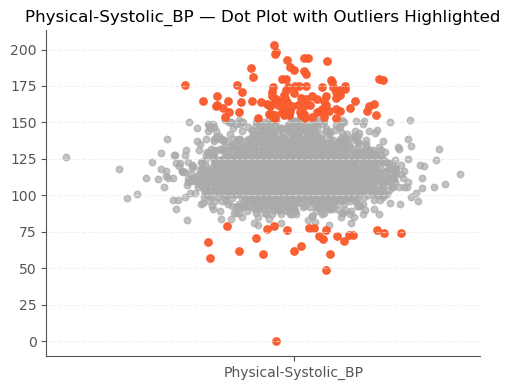

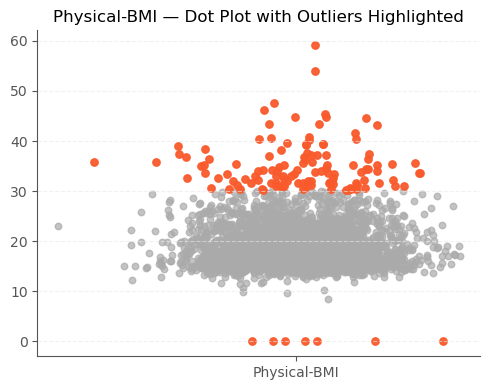

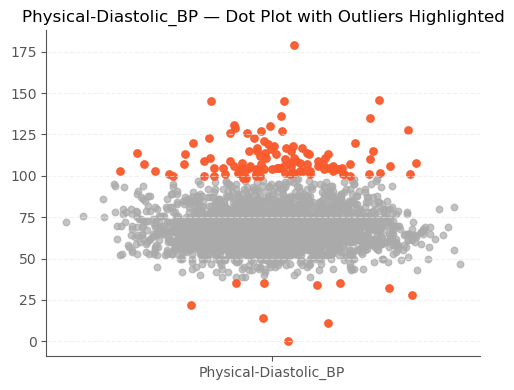

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Lấy Top 3 feature có NUM_OUT nhiều nhất
top3_df = summary_df.sort_values("NUM_OUT", ascending=False).head(3)
top3_cols = top3_df["feature"].tolist()

for col in top3_cols:
    series = df[col].dropna()
    
    # --- IQR Outlier Detection ---
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # mask outlier
    outlier_mask = (series < lower) | (series > upper)

    # điểm thường
    normal_points = series[~outlier_mask]
    # outliers
    outlier_points = series[outlier_mask]

    # tạo jitter theo trục x
    x_normal = np.random.normal(1, 0.04, size=len(normal_points))
    x_out = np.random.normal(1, 0.04, size=len(outlier_points))

    plt.figure(figsize=(5, 4))

    # 🎨 điểm thường — màu xám
    plt.scatter(
        x_normal, normal_points,
        color="#AAAAAA",
        alpha=0.7,
        s=22
    )

    # 🎨 outliers — màu cam nổi bật
    plt.scatter(
        x_out, outlier_points,
        color="#F95A2C",
        alpha=0.95,
        s=28
    )

    # --- Styling ---
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color("#555555")
    ax.spines['bottom'].set_color("#555555")

    ax.tick_params(axis='x', colors="#555555")
    ax.tick_params(axis='y', colors="#555555")

    plt.grid(axis='y', linestyle='--', color="#E8E8E8", alpha=0.6)

    plt.title(f"{col} — Dot Plot with Outliers Highlighted", color="black")
    plt.xticks([1], [col])

    plt.tight_layout()
    plt.show()


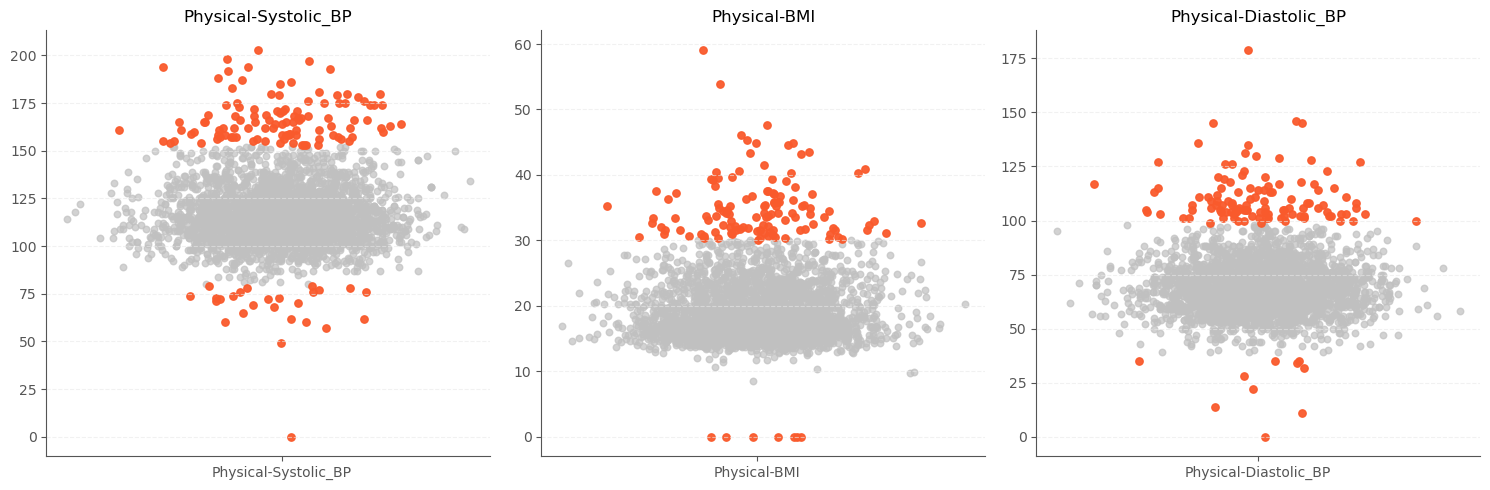

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Lấy Top 3 feature có NUM_OUT nhiều nhất
top3_df = summary_df.sort_values("NUM_OUT", ascending=False).head(3)
top3_cols = top3_df["feature"].tolist()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(top3_cols):
    series = df[col].dropna()

    # --- IQR Outlier Detection ---
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outlier_mask = (series < lower) | (series > upper)

    normal_points = series[~outlier_mask]
    outlier_points = series[outlier_mask]

    # jitter cho scatter
    x_norm = np.random.normal(1, 0.04, size=len(normal_points))
    x_out = np.random.normal(1, 0.04, size=len(outlier_points))

    # 🎨 scatter điểm thường: xám
    axes[i].scatter(
        x_norm, normal_points,
        color="#C0C0C0",
        alpha=0.7,
        s=22
    )

    # 🎨 outliers: cam
    axes[i].scatter(
        x_out, outlier_points,
        color="#F95A2C",
        alpha=0.95,
        s=28
    )

    # --- Styling ---
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['left'].set_color("#555555")
    axes[i].spines['bottom'].set_color("#555555")

    axes[i].tick_params(axis='x', colors="#555555")
    axes[i].tick_params(axis='y', colors="#555555")

    axes[i].grid(axis='y', linestyle='--', color="#E8E8E8", alpha=0.6)

    axes[i].set_title(col, color="black")
    axes[i].set_xticks([1])
    axes[i].set_xticklabels([col])

plt.tight_layout()
plt.show()


In [10]:
# Số outlier lớn nhất
max_outliers = summary_df["NUM_OUT"].max()

# Số outlier nhỏ nhất
min_outliers = summary_df["NUM_OUT"].min()

# In ra
print(f"Số outlier lớn nhất giữa các biến: {max_outliers}")
print(f"Số outlier nhỏ nhất giữa các biến: {min_outliers}")


Số outlier lớn nhất giữa các biến: 135
Số outlier nhỏ nhất giữa các biến: 3


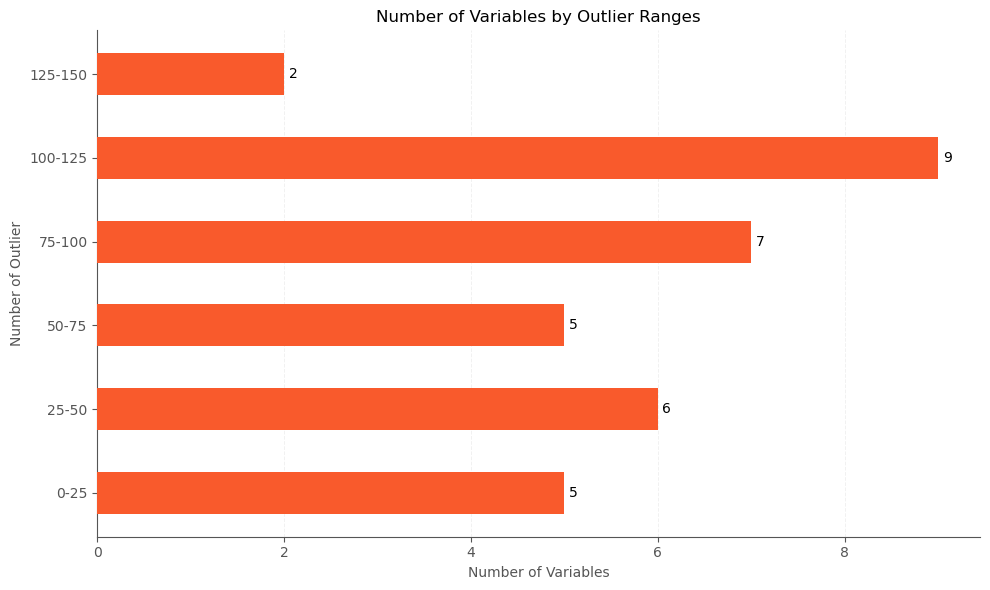

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Khoảng cho số outlier
bins = [0, 25, 50, 75, 100, 125, 150]
labels = ["0-25", "25-50", "50-75", "75-100", "100-125", "125-150"]

# Thêm cột nhóm theo khoảng
summary_df['OUTLIER_RANGE'] = pd.cut(summary_df['NUM_OUT'], bins=bins, labels=labels, right=False)
import matplotlib.pyplot as plt

# Đếm số biến trong mỗi khoảng
range_counts = summary_df['OUTLIER_RANGE'].value_counts().reindex(labels, fill_value=0)

plt.figure(figsize=(10, 6))

# Vẽ bar chart ngang với chiều rộng 0.5
bars = plt.barh(range_counts.index, range_counts.values, color="#F95A2C", height=0.5, zorder=3)

# Thêm nhãn số ở cuối mỗi thanh
for bar in bars:
    width = bar.get_width()
    plt.text(width +0.05 , bar.get_y() + bar.get_height()/2,
             str(int(width)),
             va='center', ha='left', color="black", fontsize=10)

# Grid nhạt
plt.grid(axis='x', color="#E8E8E8", linestyle='--', linewidth=0.7, alpha=0.6, zorder=0)

# Bỏ khung trên + phải
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Viền trái + dưới màu xám
ax.spines['left'].set_color("#555555")
ax.spines['bottom'].set_color("#555555")

# Nhãn trục màu xám
ax.tick_params(axis='x', colors="#555555")
ax.tick_params(axis='y', colors="#555555")

# Tiêu đề màu đen
plt.title("Number of Variables by Outlier Ranges", color="black")

# Nhãn trục
plt.xlabel("Number of Variables", color="#555555")
plt.ylabel("Number of Outlier", color="#555555")

plt.tight_layout()
plt.show()


In [12]:
# In ra số outlier và phần trăm outlier của từng biến
for idx, row in summary_df.iterrows():
    print(f"Feature: {row['feature']}, NUM_OUT: {row['NUM_OUT']}, %OUT: {row['%OUT']:.2%}")


Feature: Basic_Demos-Age, NUM_OUT: 37, %OUT: 0.93%
Feature: CGAS-CGAS_Score, NUM_OUT: 6, %OUT: 0.25%
Feature: Physical-BMI, NUM_OUT: 128, %OUT: 4.24%
Feature: Physical-Weight, NUM_OUT: 77, %OUT: 2.50%
Feature: Physical-Waist_Circumference, NUM_OUT: 25, %OUT: 2.78%
Feature: Physical-Diastolic_BP, NUM_OUT: 123, %OUT: 4.16%
Feature: Physical-HeartRate, NUM_OUT: 22, %OUT: 0.74%
Feature: Physical-Systolic_BP, NUM_OUT: 135, %OUT: 4.57%
Feature: Fitness_Endurance-Max_Stage, NUM_OUT: 10, %OUT: 1.35%
Feature: Fitness_Endurance-Time_Mins, NUM_OUT: 56, %OUT: 7.57%
Feature: FGC-FGC_CU, NUM_OUT: 116, %OUT: 5.00%
Feature: FGC-FGC_GSND, NUM_OUT: 46, %OUT: 4.28%
Feature: FGC-FGC_GSD, NUM_OUT: 46, %OUT: 4.28%
Feature: FGC-FGC_PU, NUM_OUT: 81, %OUT: 3.51%
Feature: FGC-FGC_SRL, NUM_OUT: 123, %OUT: 5.34%
Feature: FGC-FGC_SRR, NUM_OUT: 114, %OUT: 4.94%
Feature: FGC-FGC_TL, NUM_OUT: 3, %OUT: 0.13%
Feature: BIA-BIA_BMC, NUM_OUT: 111, %OUT: 5.58%
Feature: BIA-BIA_BMI, NUM_OUT: 86, %OUT: 4.32%
Feature: BIA-BIA

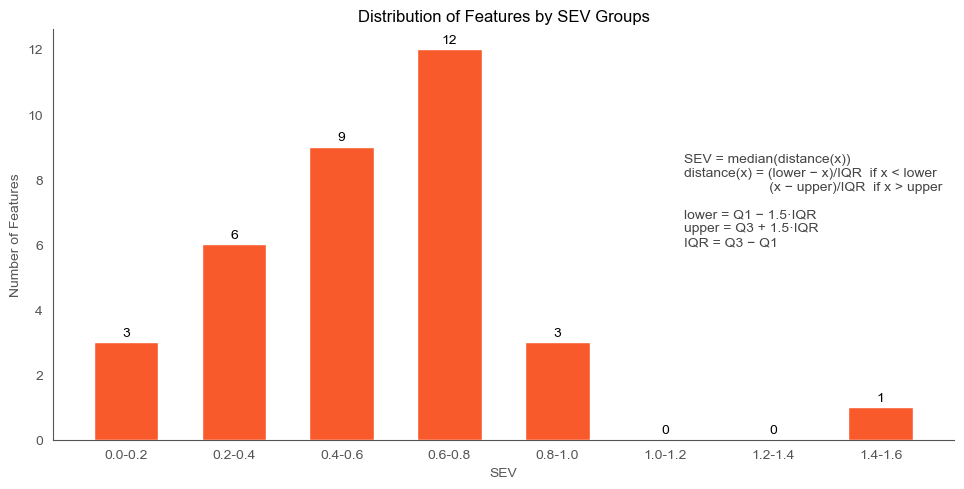

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Lấy SEV từ summary_df
sev_values = summary_df["SEV"].values

# Chia nhóm 0.0, 0.2, 0.4, ..., max_SEV
bin_edges = np.arange(0, sev_values.max() + 0.2, 0.2)
hist, _ = np.histogram(sev_values, bins=bin_edges)

# Nhãn cho trục x
labels = [f"{bin_edges[i]:.1f}-{bin_edges[i+1]:.1f}" for i in range(len(hist))]

plt.figure(figsize=(10, 5))
bars = plt.bar(labels, hist,width=0.6, color="#F95A2C", zorder=3)

# Nhãn số lượng feature trên đỉnh mỗi cột
for bar, count in zip(bars, hist):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.1, str(count), ha='center', va='bottom', fontsize=10, color="black")

# Nhãn x-axis nằm ngang
plt.xticks(rotation=0, ha='center', fontsize=10)

# Nhãn y màu xám
ax = plt.gca()
ax.tick_params(axis='y', colors="#555555")
ax.tick_params(axis='x', colors="#555555")

# Bỏ viền trên + phải
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Viền trái + dưới màu xám
ax.spines['left'].set_color("#555555")
ax.spines['bottom'].set_color("#555555")

# Grid nhạt phía sau bar
plt.grid(False)

# Tiêu đề màu đen
plt.title("Distribution of Features by SEV Groups", color="black")
plt.ylabel("Number of Features", color="#555555")
plt.xlabel("SEV", color="#555555")
formula_text = (
    "SEV = median(distance(x))\n"
    "distance(x) = (lower − x)/IQR  if x < lower\n"
    "                      (x − upper)/IQR  if x > upper\n"
    "\n"
    "lower = Q1 − 1.5·IQR\n"
    "upper = Q3 + 1.5·IQR\n"
    "IQR = Q3 − Q1"
)

# đặt vị trí bên trong chart (tọa độ trục Axes)
plt.text(
    0.7, 0.7,                  # (x, y) = góc phải bên trong chart
    formula_text,
    transform=ax.transAxes,
    fontsize=10,
    color="#444444",
    ha="left",
    va="top",
    bbox=dict(
        facecolor="white",
        edgecolor="none",
        alpha=0.7,
        pad=5
    )
)
plt.tight_layout()
plt.show()


In [ ]:
nh